<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">  M2.859 · Visualización de datos · PEC2</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">  Estudios de Informática, Multimedia y Telecomunicación</p>
<p style='color: #105269; font-size: 18px; text-align:right; font-family: verdana'><b>  Máster Ciencia de Datos</b></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div style='color:white; background-color:#263b52; text-align:center'><br>
    <div style='font-size:18px; text-align:center; font-family:calibri'>
        VISUALIZACIÓN DE DATOS<br><br>
        </div><br>
    <div style='font-size:42px; text-align:center; font-family:verdana; line-height: 1.4;'>
        PEC 2: Estudio de técnicas de visualización de datos  </div><br><br><br>
</div>

<p style='font-size:16px; text-align:left; color:#066178'>
        CGD <br>
        Mayo 2023 </p>
<hr style="border:4px solid #7ba5b0"> </hr>

***
<h1 style= 'color: #066178'>
2. Matrix Correlation
</h1>

***

In [2]:
import plotly.graph_objects as go
import pandas as pd

facies_data = pd.read_csv('/Users/cgd/* VD/PEC2/facies_data.csv')
facies_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [3]:
corr_matrix = round(facies_data.corr(), 4)
corr_matrix

/var/folders/v4/74xgv0954936fxrjdx6yw9380000gp/T/ipykernel_11042/3787482836.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.0000,0.3402,-0.3443,0.3945,-0.2341,-0.3559,0.7042,0.8547,0.0685
Depth,0.3402,1.0000,-0.0641,0.1780,-0.0914,-0.0744,0.2776,0.2971,0.0014
GR,-0.3443,-0.0641,1.0000,-0.1556,0.1900,0.2483,-0.2890,-0.2811,-0.1735
ILD_log10,0.3945,0.1780,-0.1556,1.0000,-0.1176,-0.5229,0.3846,0.5193,0.0880
DeltaPHI,-0.2341,-0.0914,0.1900,-0.1176,1.0000,-0.2502,0.0115,-0.1740,0.0366
PHIND,-0.3559,-0.0744,0.2483,-0.5229,-0.2502,1.0000,-0.5734,-0.4884,-0.0345
PE,0.7042,0.2776,-0.2890,0.3846,0.0115,-0.5734,1.0000,0.6571,0.0189
NM_M,0.8547,0.2971,-0.2811,0.5193,-0.1740,-0.4884,0.6571,1.0000,0.0366
RELPOS,0.0685,0.0014,-0.1735,0.0880,0.0366,-0.0345,0.0189,0.0366,1.0000


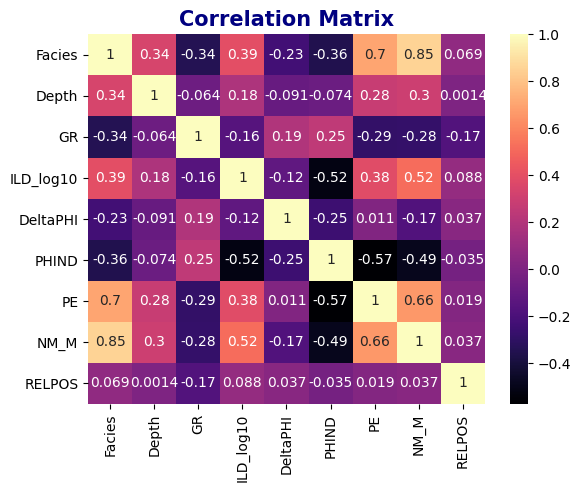

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

# Se crea matriz de correlación usando Seaborn
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix', fontsize=15, color= 'navy', fontweight='bold')
plt.show(heatmap)

# Se obtiene figura
fig_cor = heatmap.get_figure()

# Se guarda como archivo en local
fig_cor.savefig("correlation_matrix.png")
d3fig = mpld3.fig_to_html(fig_cor)

# Guardar figura en archivo HTML
with open('correlation_matrix.html', 'w') as f:
    f.write(d3fig)